In [42]:
%matplotlib inline 

In [43]:
from random import randint

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

from load_data import get_training_data, test_data_generator, get_validation_data, data_generator, get_test_data

In [44]:
training_data = get_training_data()
test_data = get_test_data()
validation_data = get_validation_data()

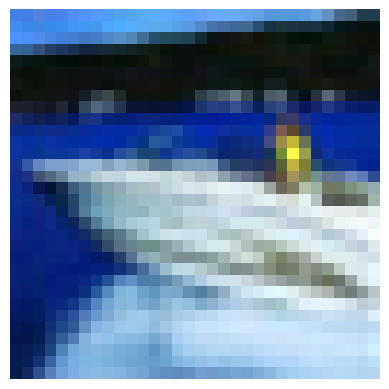

In [45]:
random_index = randint(0, len(training_data["data"]) - 1)
img = training_data["data"][random_index]

# Separate the color channels
red = img[0:1024].reshape((32, 32))
green = img[1024:2048].reshape((32, 32))
blue = img[2048:3072].reshape((32, 32))

# Stack channels along the third dimension
img_rgb = np.stack((red, green, blue), axis=2)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [46]:
# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [47]:
# Define the number of classes and image size
num_classes = 10
image_size = 32

In [48]:
train_generator = data_generator(
    training_data["data"], training_data["labels"], image_size, image_size, batch_size=8
)
validation_generator = data_generator(
    validation_data["data"],
    validation_data["labels"],
    image_size,
    image_size,
    batch_size=8,
)

In [49]:
# Fit the model using the generator
steps_per_epoch = len(training_data["data"]) // 16
validation_steps = len(validation_data["data"]) // 16
num_epochs = 10
learning_rate = 0.001

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 70s 21ms/step - accuracy: 0.1640 - loss: 2.4244 - val_accuracy: 0.2140 - val_loss: 2.5051
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.2289 - loss: 2.1231 - val_accuracy: 0.2038 - val_loss: 2.0863
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.2095 - loss: 2.1594 - val_accuracy: 0.2116 - val_loss: 2.2744
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.2375 - loss: 2.0499 - val_accuracy: 0.2552 - val_loss: 1.9802
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.2732 - loss: 1.9302 - val_accuracy: 0.2802 - val_loss: 1.8766
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.2847 - loss: 1.8913 - val_accuracy: 0.2870 - val_loss: 1.9431
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.2805 - loss: 1.9076 - val_accuracy: 0.3104 - val_loss: 1.8495
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.3250 -

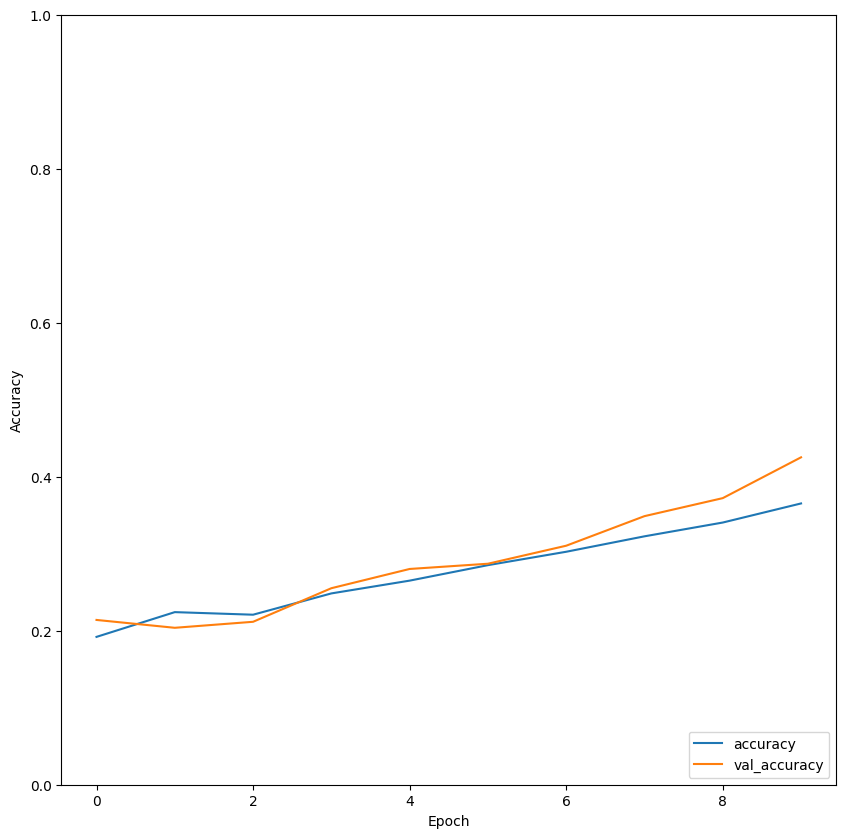

1250/1250 - 19s - 15ms/step - accuracy: 0.4156 - loss: 1.5545
0.4156000018119812


2024-11-08 08:28:12.714814: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2170765361025533014
2024-11-08 08:28:12.714889: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 14175905901256750634


In [50]:
from mobilenet import compile_mobilenet_model
mobilenet_model = compile_mobilenet_model(image_size, image_size, num_classes, learning_rate)

model = mobilenet_model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

test_generator = test_data_generator(
    test_data["data"], test_data["labels"], image_size, image_size, batch_size=8
)
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(test_acc)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - accuracy: 0.1511 - loss: 2.5708 - val_accuracy: 0.1032 - val_loss: 2.3212
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.2232 - loss: 2.1518 - val_accuracy: 0.1030 - val_loss: 5.3969
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.1565 - loss: 2.2639 - val_accuracy: 0.0966 - val_loss: 4.4050
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.1559 - loss: 2.2032 - val_accuracy: 0.1004 - val_loss: 4.6235
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.1422 - loss: 2.2794 - val_accuracy: 0.1212 - val_loss: 2.7374
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.1586 - loss: 2.1706 - val_accuracy: 0.1592 - val_loss: 2.9401
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.1636 - loss: 2.1483 - val_accuracy: 0.1532 - val_loss: 2.3853
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.1637 -

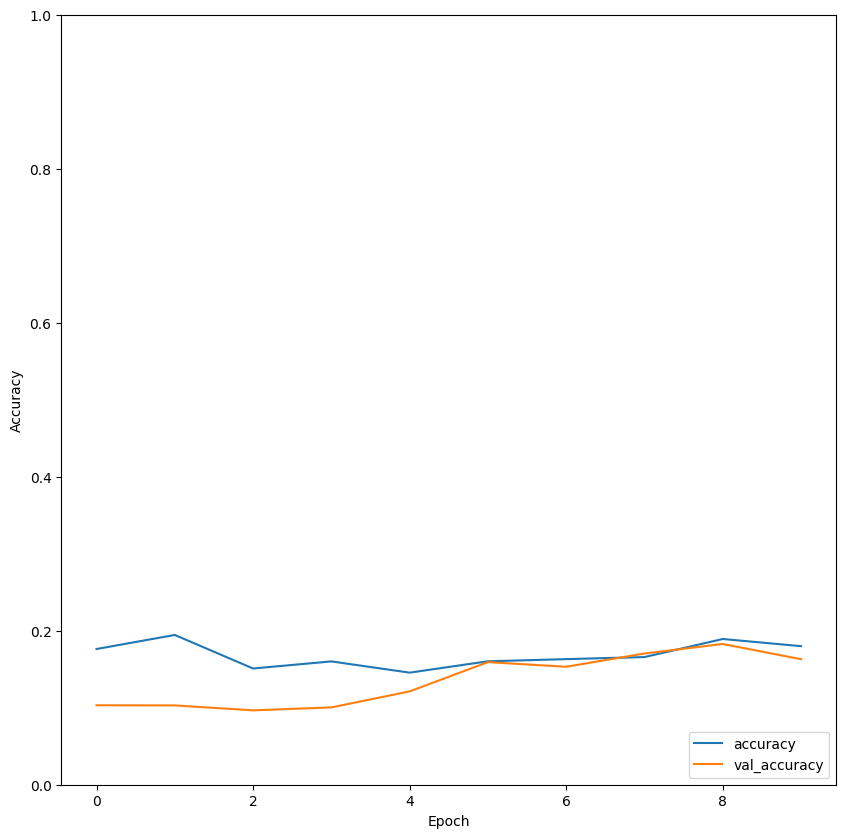

1250/1250 - 18s - 14ms/step - accuracy: 0.1573 - loss: 2.2009
0.15729999542236328


2024-11-08 08:37:38.061624: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2170765361025533014
2024-11-08 08:37:38.061719: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 14175905901256750634


In [51]:
from mobilenetv2 import compile_mobilenet_v2_model

mobilenet_v2_model = compile_mobilenet_v2_model(
    image_size, image_size, num_classes, learning_rate
)

model = mobilenet_v2_model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

test_generator = test_data_generator(
    test_data["data"], test_data["labels"], image_size, image_size, batch_size=8
)
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(test_acc)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.2195 - loss: 2.1898 - val_accuracy: 0.0962 - val_loss: 2.3057
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.3187 - loss: 1.8440 - val_accuracy: 0.3572 - val_loss: 1.7746
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.3698 - loss: 1.7394 - val_accuracy: 0.3134 - val_loss: 3.9419
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.3916 - loss: 1.6760 - val_accuracy: 0.2482 - val_loss: 9.9460
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.4036 - loss: 1.6514 - val_accuracy: 0.3858 - val_loss: 2.3534
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.4289 - loss: 1.5970 - val_accuracy: 0.4198 - val_loss: 1.9917
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.4251 - loss: 1.6160 - val_accuracy: 0.3288 - val_loss: 2.2282
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 0.4333 -

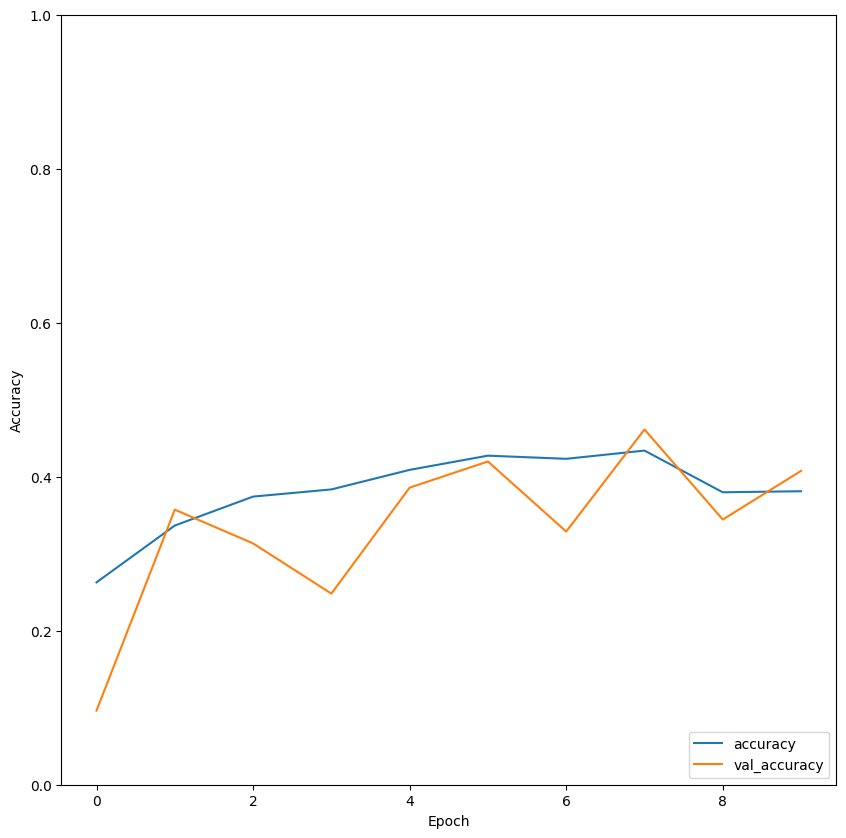

1250/1250 - 19s - 15ms/step - accuracy: 0.3980 - loss: 1.8048
0.39800000190734863


2024-11-08 08:47:33.674587: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2170765361025533014
2024-11-08 08:47:33.674654: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 14175905901256750634


In [52]:
from mobilenetv3 import compile_mobilenet_v3_model

mobilenet_v3_model = compile_mobilenet_v3_model(
    image_size, image_size, num_classes, learning_rate
)

model = mobilenet_v3_model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

test_generator = test_data_generator(
    test_data["data"], test_data["labels"], image_size, image_size, batch_size=8
)
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(test_acc)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 62s 23ms/step - accuracy: 0.2315 - loss: 2.1527 - val_accuracy: 0.3566 - val_loss: 1.7179
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 0.3935 - loss: 1.6803 - val_accuracy: 0.4476 - val_loss: 1.5083
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.4621 - loss: 1.5099 - val_accuracy: 0.4956 - val_loss: 1.4272
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.4900 - loss: 1.4375 - val_accuracy: 0.5460 - val_loss: 1.2984
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.5326 - loss: 1.3183 - val_accuracy: 0.5460 - val_loss: 1.2914
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.5475 - loss: 1.2790 - val_accuracy: 0.5758 - val_loss: 1.1935
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.5972 - loss: 1.1553 - val_accuracy: 0.5866 - val_loss: 1.1647
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.5986 -

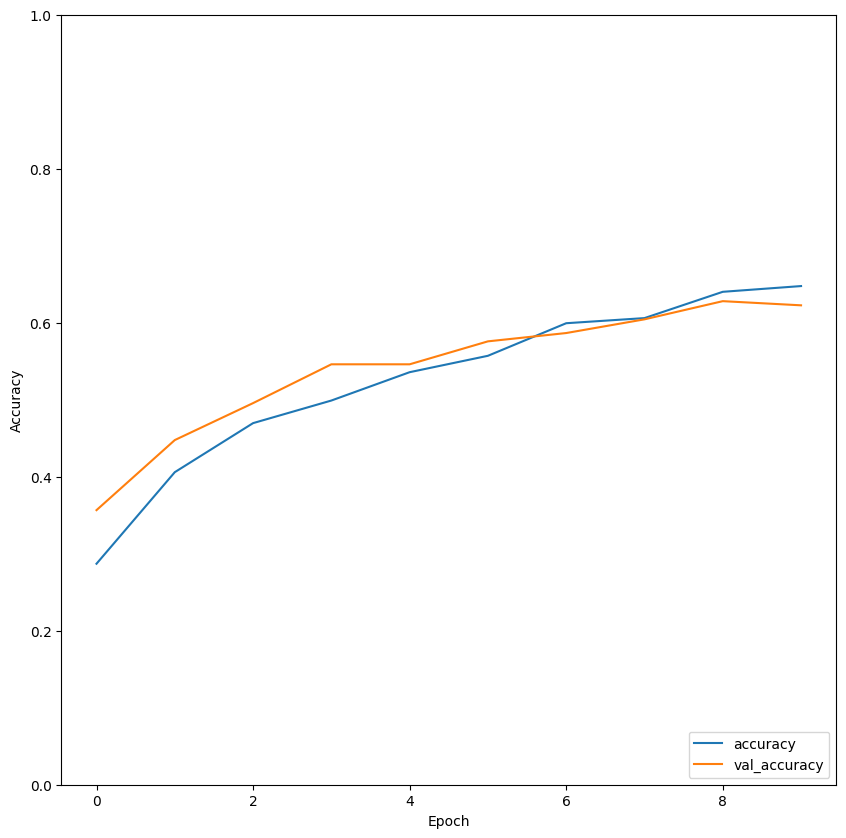

1250/1250 - 16s - 13ms/step - accuracy: 0.6170 - loss: 1.1028
0.6169999837875366


2024-11-08 08:56:50.329887: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2170765361025533014
2024-11-08 08:56:50.329946: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 14175905901256750634


In [53]:
from alexnet import compile_alexnet_model

alexnet_model = compile_alexnet_model(
    image_size, image_size, num_classes, learning_rate
)

model = alexnet_model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

test_generator = test_data_generator(
    test_data["data"], test_data["labels"], image_size, image_size, batch_size=8
)
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(test_acc)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 20ms/step - accuracy: 0.2470 - loss: 5.9896 - val_accuracy: 0.2680 - val_loss: 3.3738
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - accuracy: 0.3673 - loss: 2.4172 - val_accuracy: 0.3884 - val_loss: 1.8003
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.4048 - loss: 1.8265 - val_accuracy: 0.4138 - val_loss: 1.6733
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.4469 - loss: 1.6004 - val_accuracy: 0.4516 - val_loss: 1.5716
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.4897 - loss: 1.4520 - val_accuracy: 0.5288 - val_loss: 1.3331
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.5184 - loss: 1.3443 - val_accuracy: 0.5904 - val_loss: 1.1834
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - accuracy: 0.5698 - loss: 1.2137 - val_accuracy: 0.5774 - val_loss: 1.1737
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.5820 -

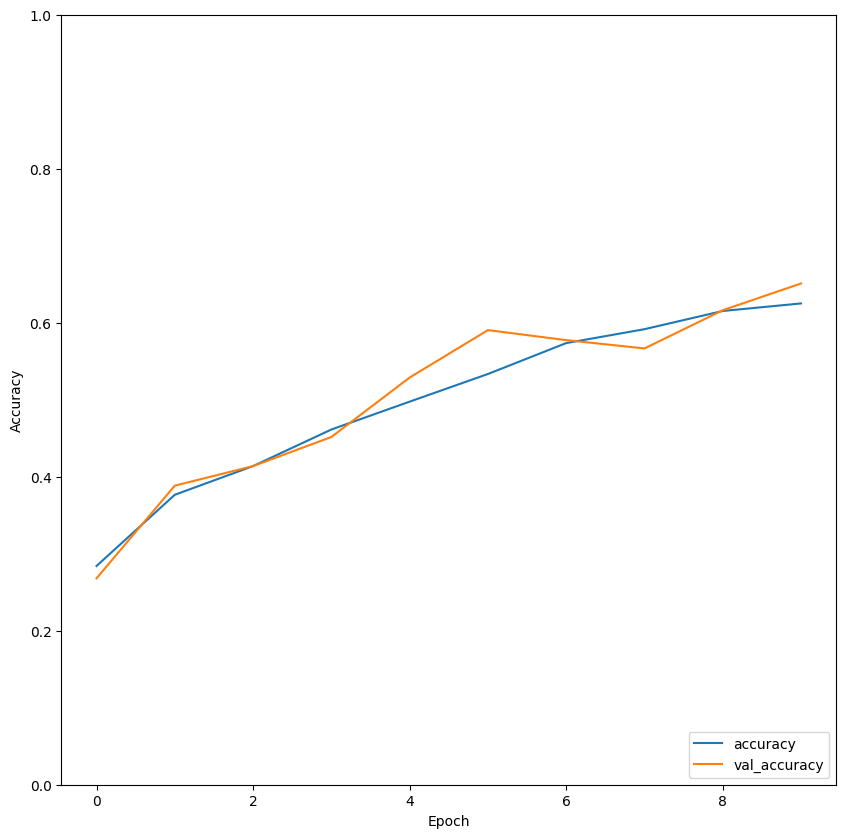

1250/1250 - 16s - 13ms/step - accuracy: 0.6420 - loss: 1.0173
0.6420000195503235


2024-11-08 09:04:47.658907: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-11-08 09:04:47.658947: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2170765361025533014
2024-11-08 09:04:47.658966: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 14175905901256750634


In [54]:
from resnet18 import compile_resnet_model

resnet_model = compile_resnet_model(num_classes, learning_rate)

model = resnet_model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

test_generator = test_data_generator(
    test_data["data"], test_data["labels"], image_size, image_size, batch_size=8
)
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(test_acc)